In [1]:
!pip install --upgrade scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np

In [3]:
data_2018 = pd.read_csv('https://raw.githubusercontent.com/chayaphon12345/DSDE-Project-Scopus-Dataset-/refs/heads/main/Dataset/2018_combined_info.csv', low_memory=False)
data_2019 = pd.read_csv('https://raw.githubusercontent.com/chayaphon12345/DSDE-Project-Scopus-Dataset-/refs/heads/main/Dataset/2019_combined_info.csv', low_memory=False)
data_2020 = pd.read_csv('https://raw.githubusercontent.com/chayaphon12345/DSDE-Project-Scopus-Dataset-/refs/heads/main/Dataset/2020_combined_info.csv', low_memory=False)
data_2021 = pd.read_csv('https://raw.githubusercontent.com/chayaphon12345/DSDE-Project-Scopus-Dataset-/refs/heads/main/Dataset/2021_combined_info.csv', low_memory=False)
data_2022 = pd.read_csv('https://raw.githubusercontent.com/chayaphon12345/DSDE-Project-Scopus-Dataset-/refs/heads/main/Dataset/2022_combined_info.csv', low_memory=False)
data_2023 = pd.read_csv('https://raw.githubusercontent.com/chayaphon12345/DSDE-Project-Scopus-Dataset-/refs/heads/main/Dataset/2023_combined_info.csv', low_memory=False)
data_web_scraping = pd.read_csv('https://raw.githubusercontent.com/chayaphon12345/DSDE-Project-Scopus-Dataset-/refs/heads/main/Dataset/ieee_articles_metadata_complete_001.csv', low_memory=False)

In [4]:
data_2018.head(3)

,doi,title,cover_date,subject_areas,src_type,publication_name,publisher,author,affil_name,affil_city,...,citedby_count,ref_count,ref_doi,ref_fid,ref_sgr,ref_title,ref_author,open_access,funding_agency,funding_country
0,10.1007/978-3-319-98485-8_15,Public health and international epidemiology f...,2018-12-31,MEDI,b,"Radiology in Global Health: Strategies, Implem...",Springer International Publishing,Pongpirul K.|Lungren M.P.,Stanford University School of Medicine|Chulalo...,Stanford|Bangkok|Bangkok|Stanford|Palo Alto|Ba...,...,1,76.0,NaN,NaN,NaN,The untilled fields of public health|Committee...,Winslow C.E.|Heggenhougen K.|Quah S.R.|Kirch W...,False,NaN,NaN
1,10.23919/PIERS.2018.8597669,Flexible Printed Active Antenna for Digital Te...,2018-12-31,ENGI|MATE,p,Progress in Electromagnetics Research Symposium,Institute of Electrical and Electronics Engine...,Pratumsiri T.|Janpugdee P.,NaN,NaN,...,1,4.0,NaN,NaN,NaN,Development of built-in low-profile antenna fo...,Pratumsiri T.|Janpugdee P.|Pratumsiri T.|Janpu...,False,NaN,NaN
2,10.1016/j.ces.2018.08.042,Parametric study of hydrogen production via so...,2018-12-31,CHEM|CENG|ENGI,j,Chemical Engineering Science,Elsevier Ltd,Phuakpunk K.|Chalermsinsuwan B.|Putivisutisak ...,NaN,NaN,...,21,42.0,NaN,b0005|b0010|b0015|b0020|b0025|b0030|b0035|b004...,2942655685|84908055658|85052199786|84859716773...,Capture of CO2from combustion gases in a fluid...,Abanades J.C.|Anthony E.J.|Lu D.Y.|Salvador C....,False,Center of Excellence in Catalysis and Catalyti...,1605651|1605651|1605651


In [5]:
data_web_scraping.head(3)

,Document ID,Publisher,Cited-by-count,Authors,Public name,Year,Doi,Affiliations,Bibliography Count,Subject Area
0,10000,IEEE,7,R. Bisiani / F. Lecouat / V. Ambriola,IEEE Software,1988,10.1109/52.10000,"Carnegie Mellon University, USA / Dept. of Com...",12,ENG
1,10001,IEEE,18,J.J.-P. Tsai / J.C. Ridge,IEEE Software,1988,10.1109/52.10001,"University of Illinois, Chicago, USA / Motorol...",9,ENG
2,10002,IEEE,42,S. Fickas / P. Nagarajan,IEEE Software,1988,10.1109/52.10002,"University of Oregon, USA / Apple Computer, Inc.",13,ENG


In [6]:
data_2018.shape

(2792, 21)

In [7]:
data_2018.columns

Index(['doi', 'title', 'cover_date', 'subject_areas', 'src_type',
       'publication_name', 'publisher', 'author', 'affil_name', 'affil_city',
       'affil_country', 'citedby_count', 'ref_count', 'ref_doi', 'ref_fid',
       'ref_sgr', 'ref_title', 'ref_author', 'open_access', 'funding_agency',
       'funding_country'],
      dtype='object')

In [8]:
data_web_scraping.columns

Index(['Document ID', 'Publisher', 'Cited-by-count', 'Authors', 'Public name',
       'Year', 'Doi', 'Affiliations', 'Bibliography Count', 'Subject Area'],
      dtype='object')

In [9]:
data_web_scraping['Authors'].apply(lambda x: x.replace(' / ', '|'))

,Authors
0,R. Bisiani|F. Lecouat|V. Ambriola
1,J.J.-P. Tsai|J.C. Ridge
2,S. Fickas|P. Nagarajan
3,K.W. Miller|L.J. Morell|F. Stevens
4,R.D. Cameron
...,...
1095,E.K. Aksenova|G.L. Dorofeev|E.Yu. Klimenko
1096,M.A. Hilal|D.W. Lieurance|D.L. Walker
1097,G. Moritz|F. Klos|B. Langenbeck|Q. Youlun|K. Z...
1098,P. Bertrand|C. Eveillard|B. Fernandez|A. Lemar...


In [10]:
data_web_scraping['Affiliations'].apply(lambda x: x.replace(' / ', '|'))

,Affiliations
0,"Carnegie Mellon University, USA|Dept. of Compu..."
1,"University of Illinois, Chicago, USA|Motorola ..."
2,"University of Oregon, USA|Apple Computer, Inc."
3,"College of William and Mary, USA|College of Wi..."
4,"Simon Fraser University, Canada"
...,...
1095,"I. V. Kurchatov Institute of Atomic Energy, Mo..."
1096,"General Dynamics Space Systems Division, San D..."
1097,Gesellachaft fur Schwerionenforschun gmbH Darm...
1098,"GANIL, Caen, France|GANIL, Caen, France|GANIL,..."


In [11]:
data_web_scraping = data_web_scraping.drop('Document ID', axis=1)

In [12]:
data_web_scraping.rename(columns={'Publisher': 'publisher', 'Cited-by-count': 'citedby_count', 'Authors': 'author', 'Public name': 'publication_name',
      'Year': 'year', 'Doi': 'doi',  'Affiliations': 'affil_name', 'Bibliography Count': 'ref_count', 'Subject Area': 'subject_areas'}, inplace=True)

In [13]:
data_web_scraping.columns

Index(['publisher', 'citedby_count', 'author', 'publication_name', 'year',
       'doi', 'affil_name', 'ref_count', 'subject_areas'],
      dtype='object')

In [14]:
for col in data_web_scraping.columns:
  data_web_scraping[data_web_scraping[col] == 'Not Found'] = pd.NA

In [15]:
data_2018['year'] = data_2018['cover_date']
data_2018['year'] = data_2018['year'].apply(lambda x: x[:4])
data_2019['year'] = data_2019['cover_date']
data_2019['year'] = data_2019['year'].apply(lambda x: x[:4])
data_2020['year'] = data_2020['cover_date']
data_2020['year'] = data_2020['year'].apply(lambda x: x[:4])
data_2021['year'] = data_2021['cover_date']
data_2021['year'] = data_2021['year'].apply(lambda x: x[:4])
data_2022['year'] = data_2022['cover_date']
data_2022['year'] = data_2022['year'].apply(lambda x: x[:4])
data_2023['year'] = data_2023['cover_date']
data_2023['year'] = data_2023['year'].apply(lambda x: x[:4])

In [16]:
data_2023['year'].head()

,year
0,2023
1,2023
2,2023
3,2023
4,2023


In [17]:
df = pd.concat([data_2018, data_2019, data_2020, data_2021, data_2022, data_2023, data_web_scraping], axis=0)

In [18]:
df.head()

,doi,title,cover_date,subject_areas,src_type,publication_name,publisher,author,affil_name,affil_city,...,ref_count,ref_doi,ref_fid,ref_sgr,ref_title,ref_author,open_access,funding_agency,funding_country,year
0,10.1007/978-3-319-98485-8_15,Public health and international epidemiology f...,2018-12-31,MEDI,b,"Radiology in Global Health: Strategies, Implem...",Springer International Publishing,Pongpirul K.|Lungren M.P.,Stanford University School of Medicine|Chulalo...,Stanford|Bangkok|Bangkok|Stanford|Palo Alto|Ba...,...,76.0,NaN,NaN,NaN,The untilled fields of public health|Committee...,Winslow C.E.|Heggenhougen K.|Quah S.R.|Kirch W...,False,NaN,NaN,2018
1,10.23919/PIERS.2018.8597669,Flexible Printed Active Antenna for Digital Te...,2018-12-31,ENGI|MATE,p,Progress in Electromagnetics Research Symposium,Institute of Electrical and Electronics Engine...,Pratumsiri T.|Janpugdee P.,NaN,NaN,...,4.0,NaN,NaN,NaN,Development of built-in low-profile antenna fo...,Pratumsiri T.|Janpugdee P.|Pratumsiri T.|Janpu...,False,NaN,NaN,2018
2,10.1016/j.ces.2018.08.042,Parametric study of hydrogen production via so...,2018-12-31,CHEM|CENG|ENGI,j,Chemical Engineering Science,Elsevier Ltd,Phuakpunk K.|Chalermsinsuwan B.|Putivisutisak ...,NaN,NaN,...,42.0,NaN,b0005|b0010|b0015|b0020|b0025|b0030|b0035|b004...,2942655685|84908055658|85052199786|84859716773...,Capture of CO2from combustion gases in a fluid...,Abanades J.C.|Anthony E.J.|Lu D.Y.|Salvador C....,False,Center of Excellence in Catalysis and Catalyti...,1605651|1605651|1605651,2018
3,10.1016/j.apsusc.2018.08.059,Superhydrophobic coating from fluoroalkylsilan...,2018-12-31,CHEM|PHYS|PHYS|PHYS|MATE,j,Applied Surface Science,Elsevier B.V.,Saengkaew J.|Le D.|Samart C.|Sawada H.|Nishida...,Hirosaki University|Chulalongkorn University|T...,Hirosaki|Bangkok|Pathum Thani|Nagoya|Nakhon Ra...,...,45.0,NaN,b0005|b0010|b0015|b0020|b0025|b0030|b0035|b004...,78349312523|53249093621|84980335769|8486252720...,Ceramic membrane performance in microfiltratio...,Abadi S.R.H.|Sebzari M.R.|Hemati M.|Rekabdar S...,False,Center of Scientific Equipment for Advanced Sc...,1861060|1605651|1605651,2018
4,10.1016/j.aca.2018.07.045,Electrochemical impedance-based DNA sensor usi...,2018-12-31,CHEM|BIOC|ENVI|CHEM,j,Analytica Chimica Acta,Elsevier B.V.,Teengam P.|Siangproh W.|Tuantranont A.|Vilaiva...,Chulalongkorn University|Thailand National Ele...,Bangkok|Pathum Thani|Fort Collins|Bangkok,...,55.0,NaN,bib1|bib2|bib3|bib4|bib5|bib6|bib7|bib8|bib9|b...,56249149272|33749077283|0037834610|73949151264...,The diagnosis and misdiagnosis of tuberculosis...,Davies P.D.O.|Pai M.|Steingart K.R.|Ng V.|Henr...,False,Colorado State University|Chulalongkorn Univer...,6252001|1605651|1605651|1605651,2018


In [19]:
df.tail()

,doi,title,cover_date,subject_areas,src_type,publication_name,publisher,author,affil_name,affil_city,...,ref_count,ref_doi,ref_fid,ref_sgr,ref_title,ref_author,open_access,funding_agency,funding_country,year
1095,10.1109/20.11380,NaN,NaN,ENG,NaN,IEEE Transactions on Magnetics,IEEE,E.K. Aksenova / G.L. Dorofeev / E.Yu. Klimenko,"I. V. Kurchatov Institute of Atomic Energy, Mo...",NaN,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0
1096,10.1109/20.11381,NaN,NaN,ENG,NaN,IEEE Transactions on Magnetics,IEEE,M.A. Hilal / D.W. Lieurance / D.L. Walker,"General Dynamics Space Systems Division, San D...",NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0
1097,10.1109/20.11382,NaN,NaN,ENG,NaN,IEEE Transactions on Magnetics,IEEE,G. Moritz / F. Klos / B. Langenbeck / Q. Youlu...,Gesellachaft fur Schwerionenforschun gmbH Darm...,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0
1098,10.1109/20.11383,NaN,NaN,ENG,NaN,IEEE Transactions on Magnetics,IEEE,P. Bertrand / C. Eveillard / B. Fernandez / A....,"GANIL, Caen, France / GANIL, Caen, France / GA...",NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0
1099,10.1109/20.11384,NaN,NaN,ENG,NaN,IEEE Transactions on Magnetics,IEEE,M. Kuchnir / E.E. Schmidt,"Fenni National Accelerator Laboratory, Batavia...",NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0


In [20]:
df['year'].value_counts()

,count
year,
2022,4244
2021,3815
2020,3393
2019,3082
2023,2890
2018,2792
1988.0,860
1998.0,84
2002.0,6


In [21]:
df.describe(include='all')

,doi,title,cover_date,subject_areas,src_type,publication_name,publisher,author,affil_name,affil_city,...,ref_count,ref_doi,ref_fid,ref_sgr,ref_title,ref_author,open_access,funding_agency,funding_country,year
count,19985,20215,20216,21166,20216,21166,21155,21166,16541,14919,...,20755.000000,8560,9830,13920,18904,19763,17740,10469,10137,21166
unique,19968,20140,1487,1721,5,5520,1459,19629,11416,7944,...,NaN,8534,4358,13882,18896,19754,2,8444,1877,9
top,10.4324/9781351013598,Preface,2022-01-01,MEDI,j,Scientific Reports,Elsevier Ltd,Ukritchon B.|Keawsawasvong S.,Chulalongkorn University|King Chulalongkorn Me...,Bangkok|Bangkok,...,NaN,10.1186/s41938-021-00376-8,CR1|CR2|CR3|CR4|CR5|CR6|CR7|CR8|CR9|CR10|CR11|...,85101464147,Behavior of lightweight aggregate concrete-enc...,Al-Shahari A.M.|Hunaiti Y.M.|Ghazaleh B.A.|Anu...,True,Chulalongkorn University|Thailand Research Fund,1605651,2022
freq,6,18,1099,2120,18012,438,1640,17,201,1705,...,NaN,7,65,7,2,2,9306,157,2260,4244
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.843219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.154905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['doi', 'title', 'cover_date', 'subject_areas', 'src_type',
       'publication_name', 'publisher', 'author', 'affil_name', 'affil_city',
       'affil_country', 'citedby_count', 'ref_count', 'ref_doi', 'ref_fid',
       'ref_sgr', 'ref_title', 'ref_author', 'open_access', 'funding_agency',
       'funding_country', 'year'],
      dtype='object')

In [23]:
drop_cols = ['doi', 'title', 'cover_date', 'publisher', 'affil_city', 'affil_country', 'ref_doi', 'ref_fid', 'ref_sgr', 'ref_title', 'ref_author', 'funding_country']
df_ai = df.drop(drop_cols, axis=1)

In [24]:
df_ai.columns

Index(['subject_areas', 'src_type', 'publication_name', 'author', 'affil_name',
       'citedby_count', 'ref_count', 'open_access', 'funding_agency', 'year'],
      dtype='object')

In [25]:
df_ai.shape

(21316, 10)

In [26]:
df_ai.head()

,subject_areas,src_type,publication_name,author,affil_name,citedby_count,ref_count,open_access,funding_agency,year
0,MEDI,b,"Radiology in Global Health: Strategies, Implem...",Pongpirul K.|Lungren M.P.,Stanford University School of Medicine|Chulalo...,1.0,76.0,False,NaN,2018
1,ENGI|MATE,p,Progress in Electromagnetics Research Symposium,Pratumsiri T.|Janpugdee P.,NaN,1.0,4.0,False,NaN,2018
2,CHEM|CENG|ENGI,j,Chemical Engineering Science,Phuakpunk K.|Chalermsinsuwan B.|Putivisutisak ...,NaN,21.0,42.0,False,Center of Excellence in Catalysis and Catalyti...,2018
3,CHEM|PHYS|PHYS|PHYS|MATE,j,Applied Surface Science,Saengkaew J.|Le D.|Samart C.|Sawada H.|Nishida...,Hirosaki University|Chulalongkorn University|T...,37.0,45.0,False,Center of Scientific Equipment for Advanced Sc...,2018
4,CHEM|BIOC|ENVI|CHEM,j,Analytica Chimica Acta,Teengam P.|Siangproh W.|Tuantranont A.|Vilaiva...,Chulalongkorn University|Thailand National Ele...,68.0,55.0,False,Colorado State University|Chulalongkorn Univer...,2018


In [27]:
df_ai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21316 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subject_areas     21166 non-null  object 
 1   src_type          20216 non-null  object 
 2   publication_name  21166 non-null  object 
 3   author            21166 non-null  object 
 4   affil_name        16541 non-null  object 
 5   citedby_count     21162 non-null  float64
 6   ref_count         20755 non-null  float64
 7   open_access       17740 non-null  object 
 8   funding_agency    10469 non-null  object 
 9   year              21166 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.8+ MB


In [28]:
df_ai.describe(include='all')

,subject_areas,src_type,publication_name,author,affil_name,citedby_count,ref_count,open_access,funding_agency,year
count,21166,20216,21166,21166,16541,21162.000000,20755.000000,17740,10469,21166
unique,1721,5,5520,19629,11416,NaN,NaN,2,8444,9
top,MEDI,j,Scientific Reports,Ukritchon B.|Keawsawasvong S.,Chulalongkorn University|King Chulalongkorn Me...,NaN,NaN,True,Chulalongkorn University|Thailand Research Fund,2022
freq,2120,18012,438,17,201,NaN,NaN,9306,157,4244
mean,NaN,NaN,NaN,NaN,NaN,9.651734,43.843219,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,27.305679,52.154905,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,22.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,37.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.000000,54.000000,NaN,NaN,NaN


In [29]:
df_ai['funding_agency'].head()

,funding_agency
0,NaN
1,NaN
2,Center of Excellence in Catalysis and Catalyti...
3,Center of Scientific Equipment for Advanced Sc...
4,Colorado State University|Chulalongkorn Univer...


In [30]:
null_counts = df_ai.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
subject_areas         150
src_type             1100
publication_name      150
author                150
affil_name           4775
citedby_count         154
ref_count             561
open_access          3576
funding_agency      10847
year                  150
dtype: int64


In [31]:
df_ai['funding_agency'] = df_ai['funding_agency'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)

In [32]:
df_ai['funding_agency'].head()

,funding_agency
0,0
1,0
2,6
3,6
4,4


In [33]:
df_ai['year'] = df_ai['year'].apply(lambda x: int(x) if isinstance(x, str) else pd.NA)

In [34]:
df_ai['year'].fillna(int(df_ai['year'].mean()), inplace=True)
df_ai['src_type'].fillna(df_ai['src_type'].mode().iloc[0], inplace=True)

<ipython-input-34-52a95b1c43da>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ai['year'].fillna(int(df_ai['year'].mean()), inplace=True)
<ipython-input-34-52a95b1c43da>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ai['year'].fillna(int(df_ai['year'].mean()), inplace=True)
<ipython-input-34-52a95b1c

In [35]:
null_counts = df_ai.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
subject_areas        150
src_type               0
publication_name     150
author               150
affil_name          4775
citedby_count        154
ref_count            561
open_access         3576
funding_agency         0
year                   0
dtype: int64


In [36]:
df_ai = df_ai.dropna()

In [37]:
null_counts = df_ai.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
subject_areas       0
src_type            0
publication_name    0
author              0
affil_name          0
citedby_count       0
ref_count           0
open_access         0
funding_agency      0
year                0
dtype: int64


In [38]:
df_ai['open_access'].value_counts()

,count
open_access,
True,7334
False,6224


In [39]:
df_ai['open_access'] = df_ai['open_access'].apply(lambda x: 1 if (str(x)=="True") else 0)

In [40]:
df_ai.head()

,subject_areas,src_type,publication_name,author,affil_name,citedby_count,ref_count,open_access,funding_agency,year
0,MEDI,b,"Radiology in Global Health: Strategies, Implem...",Pongpirul K.|Lungren M.P.,Stanford University School of Medicine|Chulalo...,1.0,76.0,0,0,2018
3,CHEM|PHYS|PHYS|PHYS|MATE,j,Applied Surface Science,Saengkaew J.|Le D.|Samart C.|Sawada H.|Nishida...,Hirosaki University|Chulalongkorn University|T...,37.0,45.0,0,6,2018
4,CHEM|BIOC|ENVI|CHEM,j,Analytica Chimica Acta,Teengam P.|Siangproh W.|Tuantranont A.|Vilaiva...,Chulalongkorn University|Thailand National Ele...,68.0,55.0,0,4,2018
6,BIOC,j,Gene,Chongsrisawat V.|Damrongphol P.|Ittiwut C.|Itt...,Chulalongkorn University|King Chulalongkorn Me...,13.0,20.0,0,2,2018
7,MEDI,b,Essentials of Interventional Cancer Pain Manag...,Johnstone C.|Ghia A.J.|Prayongrat A.,Chulalongkorn University|The University of Tex...,0.0,111.0,0,0,2018


In [41]:
df_ai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13558 entries, 0 to 2889
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subject_areas     13558 non-null  object 
 1   src_type          13558 non-null  object 
 2   publication_name  13558 non-null  object 
 3   author            13558 non-null  object 
 4   affil_name        13558 non-null  object 
 5   citedby_count     13558 non-null  float64
 6   ref_count         13558 non-null  float64
 7   open_access       13558 non-null  int64  
 8   funding_agency    13558 non-null  int64  
 9   year              13558 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


In [42]:
df_ai['open_access'].value_counts()

,count
open_access,
1,7334
0,6224


In [43]:
df_ai['subject_areas'].value_counts()

,count
subject_areas,
MEDI,1448
MULT,745
MEDI|MEDI,703
PHYS,586
AGRI,281
...,...
MEDI|NEUR|NEUR|MEDI|NEUR|MEDI|NEUR,1
HEAL|MEDI|MEDI|ENGI,1
SOCI|ENVI|SOCI|EART,1


In [44]:
df_ai['src_type'].value_counts()

,count
src_type,
j,12602
p,521
b,218
k,216
d,1


In [45]:
sub = []
aut = []
aff = []
pub = []

In [46]:
# sub_count = { 'MEDI': 0, 'CHEM': 0, 'PHYS': 0, 'MATE': 0, 'BIOC': 0, 'ENVI': 0, 'DECI': 0, 'ENGI': 0, 'COMP': 0, 'EART': 0, 'CENG':0, 'ENER':0, 'BUSI', 'ECON', 'PHAR', 'AGRI', 'NURS', 'SOCI', 'IMMU', 'NEUR', 'MATH', 'MULT', 'DENT', 'VETE', 'HEAL', 'ARTS', 'PSYC' }

In [47]:
def remove_dup_arr_str(input, i_arr):
  arr = input.split('|')
  arr = list(dict.fromkeys(arr))
  i_arr += arr
  return '|'.join(arr)

In [48]:
df_ai['subject_areas'] = df_ai['subject_areas'].apply(lambda x: remove_dup_arr_str(x, sub))
df_ai['author'] = df_ai['author'].apply(lambda x: remove_dup_arr_str(x, aut))
df_ai['affil_name'] = df_ai['affil_name'].apply(lambda x: remove_dup_arr_str(x, aff))
df_ai['publication_name'] = df_ai['publication_name'].apply(lambda x: remove_dup_arr_str(x, pub))

In [49]:
# df_ai['subject_areas'] = df_ai['subject_areas'].apply(lambda x: sum_arr(x, sub))

In [50]:
aut_dict = dict.fromkeys(aut, 0)
print(aut_dict)
aff_dict = dict.fromkeys(aff, 0)
print(aff_dict)
pub_dict = dict.fromkeys(pub, 0)
print(pub_dict)

{'Pongpirul K.': 0, 'Lungren M.P.': 0, 'Saengkaew J.': 0, 'Le D.': 0, 'Samart C.': 0, 'Sawada H.': 0, 'Nishida M.': 0, 'Chanlek N.': 0, 'Kongparakul S.': 0, 'Kiatkamjornwong S.': 0, 'Teengam P.': 0, 'Siangproh W.': 0, 'Tuantranont A.': 0, 'Vilaivan T.': 0, 'Chailapakul O.': 0, 'Henry C.S.': 0, 'Chongsrisawat V.': 0, 'Damrongphol P.': 0, 'Ittiwut C.': 0, 'Ittiwut R.': 0, 'Suphapeetiporn K.': 0, 'Shotelersuk V.': 0, 'Johnstone C.': 0, 'Ghia A.J.': 0, 'Prayongrat A.': 0, 'Kowsrihawat K.': 0, 'Vateekul P.': 0, 'Boonkwan P.': 0, 'Zhang S.': 0, 'Qin J.': 0, 'Yang C.': 0, 'Zhang X.': 0, 'Liu R.': 0, 'Roy N.': 0, 'Bundy K.': 0, 'Cheung E.': 0, 'Rujopakarn W.': 0, 'Cappellari M.': 0, 'Belfiore F.': 0, 'Yan R.': 0, 'Heckman T.': 0, 'Bershady M.': 0, 'Greene J.': 0, 'Westfall K.': 0, 'Drory N.': 0, 'Rubin K.': 0, 'Law D.': 0, 'Zhang K.': 0, 'Gelfand J.': 0, 'Bizyaev D.': 0, 'Wake D.': 0, 'Masters K.': 0, 'Thomas D.': 0, 'Li C.': 0, 'Riffel R.A.': 0, 'Visetnoi S.': 0, 'Nelles W.': 0, 'Laverock J.'

In [51]:
def count_all(x, d):
  arr = x.split('|')
  for i in arr:
    d[i] += 1
  return x

In [52]:
def sum_score(x, d):
  score = 0
  arr = x.split('|')
  for i in arr:
    score += d[i]
  return np.sqrt(score)

In [53]:
df_ai['author'] = df_ai['author'].apply(lambda x: count_all(x, aut_dict))
df_ai['affil_name'] = df_ai['affil_name'].apply(lambda x: count_all(x, aff_dict))
df_ai['publication_name'] = df_ai['publication_name'].apply(lambda x: count_all(x, pub_dict))

In [54]:
print(aut_dict)
print(aff_dict)
print(pub_dict)

{'Pongpirul K.': 98, 'Lungren M.P.': 1, 'Saengkaew J.': 1, 'Le D.': 3, 'Samart C.': 25, 'Sawada H.': 1, 'Nishida M.': 1, 'Chanlek N.': 28, 'Kongparakul S.': 23, 'Kiatkamjornwong S.': 27, 'Teengam P.': 7, 'Siangproh W.': 54, 'Tuantranont A.': 8, 'Vilaivan T.': 35, 'Chailapakul O.': 108, 'Henry C.S.': 19, 'Chongsrisawat V.': 14, 'Damrongphol P.': 2, 'Ittiwut C.': 31, 'Ittiwut R.': 16, 'Suphapeetiporn K.': 60, 'Shotelersuk V.': 101, 'Johnstone C.': 1, 'Ghia A.J.': 2, 'Prayongrat A.': 15, 'Kowsrihawat K.': 1, 'Vateekul P.': 32, 'Boonkwan P.': 6, 'Zhang S.': 439, 'Qin J.': 144, 'Yang C.': 36, 'Zhang X.': 116, 'Liu R.': 55, 'Roy N.': 1, 'Bundy K.': 1, 'Cheung E.': 2, 'Rujopakarn W.': 35, 'Cappellari M.': 1, 'Belfiore F.': 1, 'Yan R.': 1, 'Heckman T.': 1, 'Bershady M.': 2, 'Greene J.': 2, 'Westfall K.': 1, 'Drory N.': 1, 'Rubin K.': 1, 'Law D.': 2, 'Zhang K.': 4, 'Gelfand J.': 1, 'Bizyaev D.': 1, 'Wake D.': 1, 'Masters K.': 1, 'Thomas D.': 1, 'Li C.': 29, 'Riffel R.A.': 2, 'Visetnoi S.': 6, '

In [55]:
df_ai['author_freq_sq'] = df_ai.apply(lambda x: sum_score(x.author, aut_dict), axis=1)
df_ai['affil_freq_sq'] = df_ai.apply(lambda x: sum_score(x.affil_name, aff_dict), axis=1)
df_ai['publication_freq_sq'] = df_ai.apply(lambda x: sum_score(x.publication_name, pub_dict), axis=1)

In [56]:
df_ai.columns

Index(['subject_areas', 'src_type', 'publication_name', 'author', 'affil_name',
       'citedby_count', 'ref_count', 'open_access', 'funding_agency', 'year',
       'author_freq_sq', 'affil_freq_sq', 'publication_freq_sq'],
      dtype='object')

In [57]:
df_ai[['citedby_count', 'author', 'author_freq_sq', 'affil_name', 'affil_freq_sq', 'publication_name', 'publication_freq_sq']].head(30)

,citedby_count,author,author_freq_sq,affil_name,affil_freq_sq,publication_name,publication_freq_sq
0,1.0,Pongpirul K.|Lungren M.P.,9.949874,Stanford University School of Medicine|Chulalo...,108.853112,"Radiology in Global Health: Strategies, Implem...",1.000000
3,37.0,Saengkaew J.|Le D.|Samart C.|Sawada H.|Nishida...,10.440307,Hirosaki University|Chulalongkorn University|T...,111.220502,Applied Surface Science,5.000000
4,68.0,Teengam P.|Siangproh W.|Tuantranont A.|Vilaiva...,15.198684,Chulalongkorn University|Thailand National Ele...,109.571894,Analytica Chimica Acta,4.123106
6,13.0,Chongsrisawat V.|Damrongphol P.|Ittiwut C.|Itt...,14.966630,Chulalongkorn University|King Chulalongkorn Me...,114.446494,Gene,2.645751
7,0.0,Johnstone C.|Ghia A.J.|Prayongrat A.,4.242641,Chulalongkorn University|The University of Tex...,108.032403,Essentials of Interventional Cancer Pain Manag...,1.000000
8,24.0,Kowsrihawat K.|Vateekul P.|Boonkwan P.,6.244998,Chulalongkorn University|Thailand National Ele...,108.115679,Proceedings of the 5th Asian Conference on Def...,1.000000
10,17.0,Zhang S.|Qin J.|Yang C.|Zhang X.|Liu R.,28.106939,Metallurgy and Materials Research Institute Ch...,20.760539,Surface and Coatings Technology,1.732051
13,16.0,Roy N.|Bundy K.|Cheung E.|Rujopakarn W.|Cappel...,9.591663,Laboratório Interinstitucional de e-Astronomia...,117.944902,Astrophysical Journal,5.291503
14,1.0,Visetnoi S.|Nelles W.,2.828427,Chulalongkorn University|CUSAR,107.745069,IOP Conference Series: Earth and Environmental...,4.795832
16,13.0,Laverock J.|Jovic V.|Zakharov A.A.|Niu Y.R.|Ki...,4.123106,University of Virginia|Lunds Universitet|Chula...,116.867446,Physical Review Letters,7.681146


In [58]:
sub_list = ['MEDI', 'CHEM', 'PHYS', 'MATE', 'BIOC', 'ENVI', 'DECI', 'ENGI', 'COMP', 'EART', 'CENG', 'ENER', 'BUSI', 'ECON', 'PHAR', 'AGRI', 'NURS', 'SOCI', 'IMMU', 'NEUR', 'MATH', 'MULT', 'DENT', 'VETE', 'HEAL', 'ARTS', 'PSYC']
df_ai[sub_list] = 0

In [59]:
df_ai.subject_areas.value_counts()

,count
subject_areas,
MEDI,2292
MULT,745
PHYS,590
AGRI,435
BIOC,278
...,...
MATE|ENGI|COMP|CENG,1
MATE|MEDI|ENGI,1
PHYS|ENGI|MEDI,1


In [60]:
for s in sub_list:
  df_ai[s] = df_ai.apply(lambda x: 1 if x.subject_areas.__contains__(s) else 0, axis=1)

In [61]:
df_ai.columns

Index(['subject_areas', 'src_type', 'publication_name', 'author', 'affil_name',
       'citedby_count', 'ref_count', 'open_access', 'funding_agency', 'year',
       'author_freq_sq', 'affil_freq_sq', 'publication_freq_sq', 'MEDI',
       'CHEM', 'PHYS', 'MATE', 'BIOC', 'ENVI', 'DECI', 'ENGI', 'COMP', 'EART',
       'CENG', 'ENER', 'BUSI', 'ECON', 'PHAR', 'AGRI', 'NURS', 'SOCI', 'IMMU',
       'NEUR', 'MATH', 'MULT', 'DENT', 'VETE', 'HEAL', 'ARTS', 'PSYC'],
      dtype='object')

In [62]:
df_ai['MEDI'].value_counts()

,count
MEDI,
0,9449
1,4109


In [63]:
df_ai[['subject_areas', 'citedby_count', 'MEDI', 'CHEM', 'PHYS', 'MATE', 'BIOC', 'ENVI', 'DECI', 'ENGI', 'COMP',
       'EART', 'CENG', 'ENER', 'BUSI', 'ECON', 'PHAR', 'AGRI', 'NURS', 'SOCI',
       'IMMU', 'NEUR', 'MATH', 'MULT', 'DENT', 'VETE', 'HEAL', 'ARTS', 'PSYC']].head(40)

,subject_areas,citedby_count,MEDI,CHEM,PHYS,MATE,BIOC,ENVI,DECI,ENGI,...,SOCI,IMMU,NEUR,MATH,MULT,DENT,VETE,HEAL,ARTS,PSYC
0,MEDI,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEM|PHYS|MATE,37.0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEM|BIOC|ENVI,68.0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,BIOC,13.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,MEDI,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,DECI|ENGI|COMP,24.0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10,CHEM|PHYS|MATE,17.0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,PHYS|EART,16.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,ENVI|EART,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16,PHYS,13.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_ai['subject_areas'].value_counts()

,count
subject_areas,
MEDI,2292
MULT,745
PHYS,590
AGRI,435
BIOC,278
...,...
MATE|ENGI|COMP|CENG,1
MATE|MEDI|ENGI,1
PHYS|ENGI|MEDI,1


In [65]:
df_ai['affil_name'].value_counts()

affil_name
Chulalongkorn University|King Chulalongkorn Memorial Hospital                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [66]:
df_ai['affil_name'].value_counts()

affil_name
Chulalongkorn University|King Chulalongkorn Memorial Hospital                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [67]:
df_ai['publication_name'].value_counts()

,count
publication_name,
Scientific Reports,362
Journal of High Energy Physics,232
PLoS ONE,210
European Physical Journal C,108
"Physics Letters, Section B: Nuclear, Elementary Particle and High-Energy Physics",103
...,...
JAMA - Journal of the American Medical Association,1
Ceramics,1
Entrepreneurship and Sustainability Issues,1


In [68]:
obj_columns = ['subject_areas', 'publication_name', 'author', 'affil_name']
df_ai = df_ai.drop(obj_columns, axis=1)

In [69]:
nominal_columns = ["src_type"]
dummy_df = pd.get_dummies(df_ai[nominal_columns], drop_first=False)
df_ai = pd.concat([df_ai, dummy_df], axis=1)
df_ai = df_ai.drop(nominal_columns, axis=1)

In [70]:
df_ai['citedby_count'].value_counts()

,count
citedby_count,
0.0,3015
1.0,1557
2.0,1157
3.0,917
4.0,711
...,...
230.0,1
340.0,1
418.0,1


In [71]:
sort_df = df.sort_values(by='citedby_count', ascending=False)
sort_df[['author', 'publisher', 'citedby_count']].head()

,author,publisher,citedby_count
2278,Fokkens W.J.|Lund V.J.|Hopkins C.|Hellings P.W...,NLM (Medline),1356.0
2164,Prompetchara E.|Ketloy C.|Palaga T.,Allergy and Immunology Society of Thailand,1104.0
3556,Klionsky D.J.|Abdel-Aziz A.K.|Abdelfatah S.|Ab...,Taylor and Francis Ltd.,1030.0
1781,Boyd C.C.|Cheacharoen R.|Leijtens T.|McGehee M.D.,American Chemical Societyservice@acs.org,945.0
207,Algammal A.M.|Mabrok M.|Sivaramasamy E.|Yousse...,Nature Researchsubscriptions@nature.com,650.0


In [72]:
df_ai.columns

Index(['citedby_count', 'ref_count', 'open_access', 'funding_agency', 'year',
       'author_freq_sq', 'affil_freq_sq', 'publication_freq_sq', 'MEDI',
       'CHEM', 'PHYS', 'MATE', 'BIOC', 'ENVI', 'DECI', 'ENGI', 'COMP', 'EART',
       'CENG', 'ENER', 'BUSI', 'ECON', 'PHAR', 'AGRI', 'NURS', 'SOCI', 'IMMU',
       'NEUR', 'MATH', 'MULT', 'DENT', 'VETE', 'HEAL', 'ARTS', 'PSYC',
       'src_type_b', 'src_type_d', 'src_type_j', 'src_type_k', 'src_type_p'],
      dtype='object')

In [73]:
df_ai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13558 entries, 0 to 2889
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   citedby_count        13558 non-null  float64
 1   ref_count            13558 non-null  float64
 2   open_access          13558 non-null  int64  
 3   funding_agency       13558 non-null  int64  
 4   year                 13558 non-null  int64  
 5   author_freq_sq       13558 non-null  float64
 6   affil_freq_sq        13558 non-null  float64
 7   publication_freq_sq  13558 non-null  float64
 8   MEDI                 13558 non-null  int64  
 9   CHEM                 13558 non-null  int64  
 10  PHYS                 13558 non-null  int64  
 11  MATE                 13558 non-null  int64  
 12  BIOC                 13558 non-null  int64  
 13  ENVI                 13558 non-null  int64  
 14  DECI                 13558 non-null  int64  
 15  ENGI                 13558 non-null  int64

In [74]:
# df.to_csv('full_df.csv')

In [75]:
df_ai.head()

,citedby_count,ref_count,open_access,funding_agency,year,author_freq_sq,affil_freq_sq,publication_freq_sq,MEDI,CHEM,...,DENT,VETE,HEAL,ARTS,PSYC,src_type_b,src_type_d,src_type_j,src_type_k,src_type_p
0,1.0,76.0,0,0,2018,9.949874,108.853112,1.000000,1,0,...,0,0,0,0,0,True,False,False,False,False
3,37.0,45.0,0,6,2018,10.440307,111.220502,5.000000,0,1,...,0,0,0,0,0,False,False,True,False,False
4,68.0,55.0,0,4,2018,15.198684,109.571894,4.123106,0,1,...,0,0,0,0,0,False,False,True,False,False
6,13.0,20.0,0,2,2018,14.966630,114.446494,2.645751,0,0,...,0,0,0,0,0,False,False,True,False,False
7,0.0,111.0,0,0,2018,4.242641,108.032403,1.000000,1,0,...,0,0,0,0,0,True,False,False,False,False


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
y = df_ai.pop('citedby_count')
X = df_ai

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=34)

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf = RandomForestRegressor(
    n_estimators = 150,
    random_state = 42,
    max_depth=20,
    min_samples_leaf=10,
    min_samples_split = 15,
    max_leaf_nodes = 20,
    min_impurity_decrease=0.0001,
    max_features = 0.8,
    ccp_alpha=0.03,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.03, max_depth=20, max_features=0.8,
                      max_leaf_nodes=20, min_impurity_decrease=0.0001,
                      min_samples_leaf=10, min_samples_split=15,
                      n_estimators=150, n_jobs=-1, random_state=42)

In [80]:
y_pred = rf.predict(X_test)

In [81]:
y_pred[:20]

array([16.23363555,  7.26400235,  2.5726164 ,  3.222066  ,  2.53597681,
       17.44551916,  7.58678119,  2.53597681,  2.5726164 ,  2.53597681,
       11.65653441, 16.70242166,  6.19522512, 46.76144964, 17.64420041,
        2.55888929,  2.51499309,  7.44202514, 20.3543674 , 19.54415692])

In [82]:
# print the intercept
print(rf)

print(rf.n_features_in_)
print(rf.feature_names_in_)

RandomForestRegressor(ccp_alpha=0.03, max_depth=20, max_features=0.8,
                      max_leaf_nodes=20, min_impurity_decrease=0.0001,
                      min_samples_leaf=10, min_samples_split=15,
                      n_estimators=150, n_jobs=-1, random_state=42)
39
['ref_count' 'open_access' 'funding_agency' 'year' 'author_freq_sq'
 'affil_freq_sq' 'publication_freq_sq' 'MEDI' 'CHEM' 'PHYS' 'MATE' 'BIOC'
 'ENVI' 'DECI' 'ENGI' 'COMP' 'EART' 'CENG' 'ENER' 'BUSI' 'ECON' 'PHAR'
 'AGRI' 'NURS' 'SOCI' 'IMMU' 'NEUR' 'MATH' 'MULT' 'DENT' 'VETE' 'HEAL'
 'ARTS' 'PSYC' 'src_type_b' 'src_type_d' 'src_type_j' 'src_type_k'
 'src_type_p']


In [83]:
from sklearn import metrics

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 9.905354974706551
MSE: 1298.9690937673276
RMSE: 36.04121382205832


In [85]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=dict(
        n_estimators = [100, 200],
        random_state = [42],
        max_depth=[5, 15],
        min_samples_leaf=[6, 8],
        min_samples_split = [10, 15],
        max_leaf_nodes = [40, 80, 100],
        min_impurity_decrease=[0.0001],
        max_features = [0.8],
        ccp_alpha=[0.03, 0.05],
        n_jobs=[-1],
        bootstrap = [True]
    ),
    cv=5,
    n_jobs=-1,
    verbose=10
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.03, 0.05],
                         'max_depth': [5, 15], 'max_features': [0.8],
                         'max_leaf_nodes': [40, 80, 100],
                         'min_impurity_decrease': [0.0001],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [10, 15],
                         'n_estimators': [100, 200], 'n_jobs': [-1],
                         'random_state': [42]},
             verbose=10)

In [86]:
# Get Searching Result
grid_search_result = grid_search.cv_results_
pd.DataFrame.from_dict(grid_search_result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_ccp_alpha,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_decrease,...,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.877377,0.053243,0.054549,0.015100,True,0.03,5,0.8,40,0.0001,...,42,"{'bootstrap': True, 'ccp_alpha': 0.03, 'max_de...",0.204305,0.193758,0.209412,0.196014,0.262978,0.213293,0.025474,52
1,4.504520,0.901213,0.105654,0.021932,True,0.03,5,0.8,40,0.0001,...,42,"{'bootstrap': True, 'ccp_alpha': 0.03, 'max_de...",0.200811,0.189312,0.207023,0.195198,0.260654,0.210600,0.025708,64
2,1.763006,0.055506,0.072893,0.015497,True,0.03,5,0.8,40,0.0001,...,42,"{'bootstrap': True, 'ccp_alpha': 0.03, 'max_de...",0.203543,0.185103,0.212323,0.196539,0.263993,0.212300,0.027338,58
3,4.477996,0.584954,0.113399,0.016177,True,0.03,5,0.8,40,0.0001,...,42,"{'bootstrap': True, 'ccp_alpha': 0.03, 'max_de...",0.200631,0.185550,0.209735,0.193416,0.262750,0.210417,0.027358,71
4,1.803713,0.068003,0.070176,0.011656,True,0.03,5,0.8,40,0.0001,...,42,"{'bootstrap': True, 'ccp_alpha': 0.03, 'max_de...",0.205493,0.179933,0.206217,0.192356,0.267097,0.210219,0.030033,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,6.491970,1.068264,0.138320,0.028142,True,0.05,15,0.8,100,0.0001,...,42,"{'bootstrap': True, 'ccp_alpha': 0.05, 'max_de...",0.227304,0.206770,0.227823,0.207999,0.276511,0.229282,0.025284,7
92,3.730627,0.995503,0.096800,0.012973,True,0.05,15,0.8,100,0.0001,...,42,"{'bootstrap': True, 'ccp_alpha': 0.05, 'max_de...",0.229391,0.203627,0.219061,0.207658,0.285355,0.229018,0.029577,11
93,6.522716,1.208012,0.124981,0.007709,True,0.05,15,0.8,100,0.0001,...,42,"{'bootstrap': True, 'ccp_alpha': 0.05, 'max_de...",0.225273,0.207090,0.220075,0.203396,0.283336,0.227834,0.028896,24
94,2.944888,0.323651,0.075787,0.014729,True,0.05,15,0.8,100,0.0001,...,42,"{'bootstrap': True, 'ccp_alpha': 0.05, 'max_de...",0.229391,0.203627,0.219061,0.207658,0.285355,0.229018,0.029577,11


In [87]:
# Best Trained Model
model = grid_search.best_estimator_

In [88]:
# Best Trained Model
print(grid_search.best_params_)

{'bootstrap': True, 'ccp_alpha': 0.03, 'max_depth': 15, 'max_features': 0.8, 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}


In [89]:
# Predict with the best model
y_pred = model.predict(X_test)

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 9.525014454963891
MSE: 1274.9055407746564
RMSE: 35.70581942449517


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

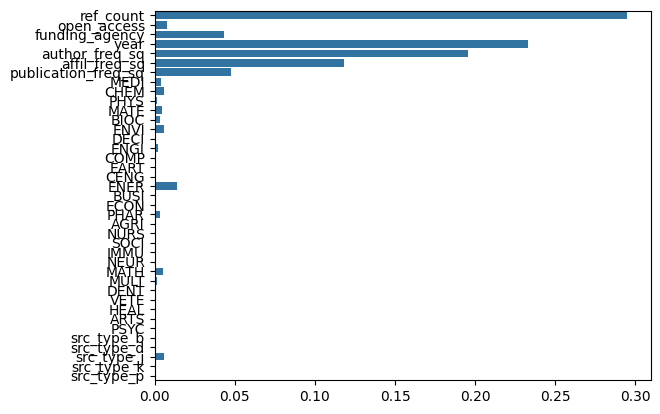

In [92]:
sns.barplot(x = model.feature_importances_, y = model.feature_names_in_)

In [93]:
import pickle
filename = 'rf0.sav'
pickle.dump(model, open(filename, 'wb'))